                        ------------ PART 1 ----------------

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1. Start by creating a new Notebook for this assignment.
2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

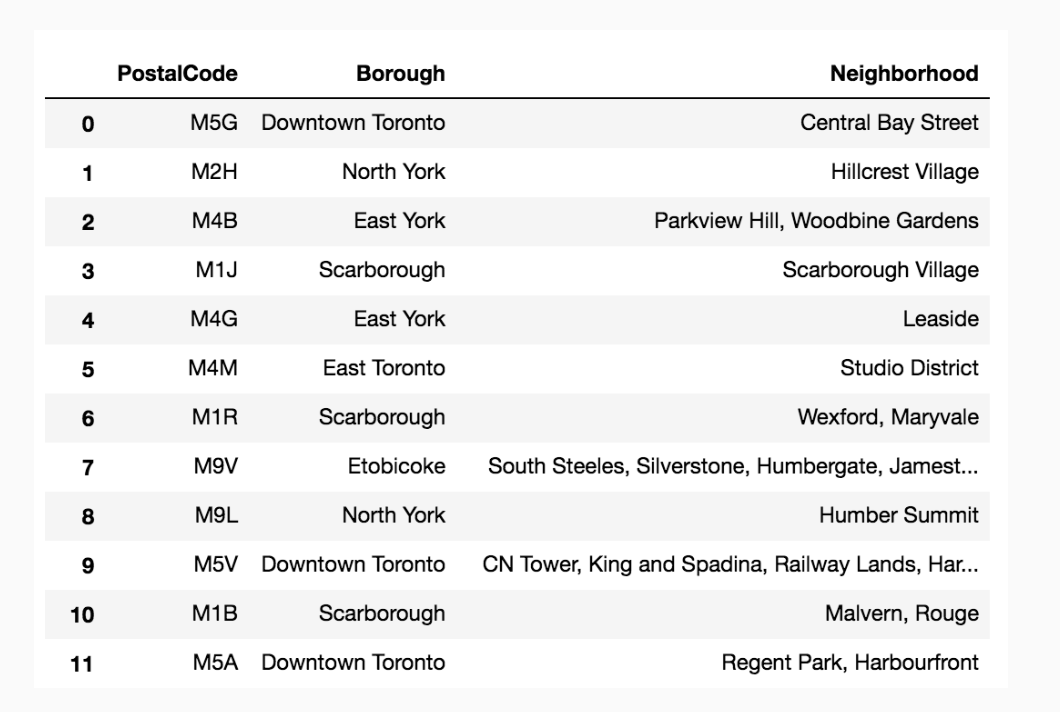

3. To create the above dataframe:

    - The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood

    - Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.

    - More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.

    - If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough. So for the 9th cell in the table on the Wikipedia page, the value of the Borough and the Neighborhood columns will be Queen's Park.

     - Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.

    - In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.

4. Submit a link to your Notebook on your Github repository. (10 marks)


Note: There are different website scraping libraries and packages in Python. One of the most common packages is BeautifulSoup. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

The package is so popular that there is a plethora of tutorials and examples of how to use it. Here is a very good Youtube video on how to use the BeautifulSoup package: https://www.youtube.com/watch?v=ng2o98k983k

Use the BeautifulSoup package or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe

                   ------------ ASSIGNMENT STARTS HERE ----------------

# Part 1

## Step 1
### get the html from wiki, parse html data using beautifulsoup, then store data in pd df

In [1]:
# install Beautiful Soup and requests for scraping
!pip install BeautifulSoup4
!pip install requests
print('done.')

done.


In [2]:
# import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

# get html from the wiki page, then create my soup object
source = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(source.text, 'lxml')

#using soup object, iterate the .wikitable to get parsed data from the HTML page. store in a list.
data = []
columns = []
table = soup.find(class_='wikitable')
for index, tr in enumerate(table.find_all('tr')):
    section = []
    for td in tr.find_all(['th','td']):
        section.append(td.text.rstrip())
    
    #First row of data is the header
    if (index == 0):
        columns = section
    else:
        data.append(section)

#convert list into Pandas DataFrame
canada_df = pd.DataFrame(data = data,columns = columns)
canada_df.head()

,Postcode,Borough,Neighbourhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront


## Step 1.5
### (from instructions) Remove boroughs that are 'Not assigned'
### Because more than one neighborhood can exist in one postal code area, I am combining these into one row with the neighborhoods separated by a comma
### If a cell has a borough but a 'Not assigned' neighborhood, then the neighborhood will be the same as the borough

In [3]:
# remove Boroughs that are 'Not assigned'
canada_df = canada_df[canada_df['Borough'] != 'Not assigned']
canada_df.head()

,Postcode,Borough,Neighbourhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M5A,Downtown Toronto,Regent Park
6,M6A,North York,Lawrence Heights


In [4]:
# more than one neighborhood can exist in one postal code area.
# combine into one row. separate neighborhoods with a comma.
canada_df['Neighbourhood'] = canada_df.groupby('Postcode')['Neighbourhood'].transform(lambda neigh: ', '.join(neigh))

# remove the duplicates
canada_df = canada_df.drop_duplicates()

# update index to postcode format
if(canada_df.index.name != 'Postcode'):
    canada_df = canada_df.set_index('Postcode')

# let's see how this looks now
canada_df.head()

,Borough,Neighbourhood
Postcode,,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Harbourfront, Regent Park"
M6A,North York,"Lawrence Heights, Lawrence Manor"
M7A,Queen's Park,Not assigned


In [5]:
# remember that a neighborhood will be the same as the borough if neighborhood is 'Not assigned'. 
canada_df['Neighbourhood'].replace("Not assigned", canada_df["Borough"],inplace=True)
canada_df.head()

,Borough,Neighbourhood
Postcode,,
M3A,North York,Parkwoods
M4A,North York,Victoria Village
M5A,Downtown Toronto,"Harbourfront, Regent Park"
M6A,North York,"Lawrence Heights, Lawrence Manor"
M7A,Queen's Park,Queen's Park


In [6]:
# use the shape method to print the number of rows and columns in new dataframe
canada_df.shape

(103, 2)